In [1]:
#LOAD THE NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [4]:
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [5]:
test['Downloads']=-999

In [6]:
concat=pd.concat([train,test])

In [7]:
concat.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [8]:
concat.shape

(41292, 11)

In [9]:
concat['Downloads'].unique()

array(['100,000+', '5,000+', '10,000+', '10,000,000+', '50,000+',
       '1,000,000+', '5,000,000+', '500,000+', '1,000+', '1,000,000,000+',
       '50,000,000+', '100+', '100,000,000+', '500+', '10+', '50+',
       '500,000,000+', '5,000,000,000+', -999], dtype=object)

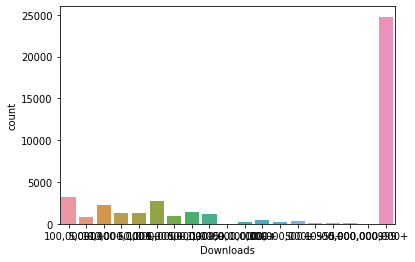

In [10]:
sns.countplot(concat['Downloads'])

In [11]:
concat.loc[concat['Price']=="Free",['Price']]=0

In [12]:
concat['Price']=concat['Price'].astype("float")

In [13]:
concat['month']=concat['Last_Updated_On'].str.split(" ",expand=True)[0]

In [14]:
concat['year']=concat['Last_Updated_On'].str.split(" ",expand=True)[2]

In [15]:
concat.drop(columns=['Last_Updated_On'],inplace=True)

In [16]:
concat['id_num']=concat['Offered_By'].str.extract('(\d+)')

In [17]:
concat['year']=concat['year'].astype('int')
concat['id_num']=concat['id_num'].astype('int')


In [18]:
str_features=(np.where(concat.dtypes==object)[0])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
lis=list(concat.columns[str_features])

In [22]:
lis.remove('Downloads')

In [23]:
for i in lis:
  concat[i]=le.fit_transform(concat[i].astype("str"))
  le=LabelEncoder()

In [24]:
concat['month']=concat['month'].astype('int')

In [25]:
!pip install catboost

     |████████████████████████████████| 65.9MB 61kB/s 


In [26]:
from catboost import CatBoostClassifier

In [27]:
cat=CatBoostClassifier(iterations=500,learning_rate=0.1,depth=6)

In [28]:
Train=concat.loc[concat['Downloads']!=-999,:]

In [29]:
Test=concat.loc[concat['Downloads']==-999,:]

In [30]:
print(Train.shape,Test.shape)

(16516, 13) (24776, 13)


In [31]:
x,y=Train.drop(columns=['Downloads']),Train['Downloads']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
cat.fit(x,y,cat_features=[0,1])

0:	learn: 2.5186252	total: 651ms	remaining: 5m 24s
1:	learn: 2.2751024	total: 1.34s	remaining: 5m 33s
2:	learn: 2.1213036	total: 2.04s	remaining: 5m 38s
3:	learn: 1.9935105	total: 2.75s	remaining: 5m 40s
4:	learn: 1.8934926	total: 3.47s	remaining: 5m 43s
5:	learn: 1.7997655	total: 4.15s	remaining: 5m 41s
6:	learn: 1.7288415	total: 4.83s	remaining: 5m 40s
7:	learn: 1.6704373	total: 5.52s	remaining: 5m 39s
8:	learn: 1.6133715	total: 6.21s	remaining: 5m 38s
9:	learn: 1.5785986	total: 6.53s	remaining: 5m 20s
10:	learn: 1.5425290	total: 7.38s	remaining: 5m 28s
11:	learn: 1.5076344	total: 8.08s	remaining: 5m 28s
12:	learn: 1.4773034	total: 8.85s	remaining: 5m 31s
13:	learn: 1.4558146	total: 9.18s	remaining: 5m 18s
14:	learn: 1.4259616	total: 9.91s	remaining: 5m 20s
15:	learn: 1.4013049	total: 10.6s	remaining: 5m 22s
16:	learn: 1.3779878	total: 11.4s	remaining: 5m 23s
17:	learn: 1.3604167	total: 12.1s	remaining: 5m 24s
18:	learn: 1.3455435	total: 12.9s	remaining: 5m 26s
19:	learn: 1.3363413	t

In [35]:
pred_cat=cat.predict_proba(Test.drop(columns=['Downloads']))

In [36]:
pred_cat=pd.DataFrame(pred_cat)

In [37]:
pred_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000163,0.021117,0.000006,0.000006,0.051095,0.000108,0.000013,0.644722,0.000060,0.000487,0.000378,0.000004,0.000007,0.182011,0.000018,0.000032,0.099758,0.000014
1,0.000096,0.174061,0.000092,0.000009,0.003355,0.002562,0.000023,0.527908,0.000604,0.000192,0.003305,0.000028,0.000012,0.024131,0.000332,0.000063,0.263065,0.000161
2,0.000013,0.044044,0.000174,0.000003,0.000038,0.758827,0.000006,0.000329,0.015264,0.000017,0.166430,0.000023,0.000003,0.000089,0.013300,0.000009,0.001035,0.000396
3,0.002073,0.004102,0.000007,0.000054,0.227821,0.000111,0.000045,0.488064,0.000049,0.009871,0.000271,0.000011,0.000078,0.230260,0.000046,0.000235,0.036889,0.000013
4,0.000501,0.022758,0.000005,0.000040,0.092275,0.000142,0.000119,0.594883,0.000076,0.001667,0.000588,0.000010,0.000078,0.213518,0.000058,0.000193,0.073068,0.000021


In [ ]:
###################################################################################

In [38]:
concat=pd.concat([train,test])

In [39]:
concat.loc[concat['Price']=="Free",['Price']]=0

In [40]:
concat['Price']=concat['Price'].astype("float")

In [41]:
concat['month']=concat['Last_Updated_On'].str.split(" ",expand=True)[0]

In [42]:
concat['year']=concat['Last_Updated_On'].str.split(" ",expand=True)[2]

In [43]:
concat['id_num']=concat['Offered_By'].str.extract('(\d+)')

In [44]:
concat['year']=concat['year'].astype('int')
concat['id_num']=concat['id_num'].astype('int')


In [45]:
concat['Rating']=round(concat['Rating'],1)
concat['Reviews']=np.log10(concat['Reviews'])
concat['Reviews']=round(concat['Reviews'],1)



In [46]:
concat['Price']=round(np.log10(concat['Price']+1),1)

In [47]:
concat.drop(columns=['Last_Updated_On'],inplace=True)

In [48]:
concat['Size']=concat['Size'].str.extract(('(\D+)'))

In [49]:
concat['rating_round']=round(concat['Rating'],0)
concat['reviews_round']=round(concat['Reviews'],0)
concat['price_round']=round(concat['Price'],0)

In [50]:
concat['release']=concat['Release_Version'].str.split('.',expand=True)[0]

In [51]:
concat.drop(columns=['Release_Version'],inplace=True)

In [52]:
str_features=(np.where(concat.dtypes==object)[0])

In [53]:
le=LabelEncoder()

In [54]:
lis=list(concat.columns[str_features])

In [55]:
lis.remove('Downloads')

In [56]:
for i in lis:
  concat[i]=le.fit_transform(concat[i].astype("str"))
  le=LabelEncoder()

In [57]:
concat['month']=concat['month'].astype('int')


In [58]:
concat.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,OS_Version_Required,Downloads,month,year,id_num,rating_round,reviews_round,price_round,release
0,16254,12,4.2,3.2,3,0.0,1,36,"100,000+",8,2020,24654,4.0,3.0,0.0,500
1,28097,38,4.8,2.5,2,0.0,1,21,"5,000+",7,2020,35329,5.0,2.0,0.0,174
2,1161,21,4.3,2.6,2,0.0,1,21,"10,000+",8,2020,11044,4.0,3.0,0.0,13
3,28918,4,4.0,5.1,3,0.0,4,36,"10,000,000+",8,2020,36068,4.0,5.0,0.0,500
4,28655,37,4.6,2.6,3,2.5,1,36,"5,000+",9,2018,35831,5.0,3.0,2.0,500


In [59]:
##Using my own function- Feature Engineer And Relax
from fear import make_double_combo

In [60]:
make_double_combo(9,concat,"cat_combine")

column name: Category
column name: Size
column name: Content_Rating
column name: OS_Version_Required
column name: year
column name: rating_round
column name: reviews_round
column name: price_round
column name: release


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,OS_Version_Required,Downloads,month,year,id_num,rating_round,reviews_round,price_round,release,Categorycat_combineSize,Categorycat_combineContent_Rating,Categorycat_combineOS_Version_Required,Categorycat_combineyear,Categorycat_combinerating_round,Categorycat_combinereviews_round,Categorycat_combineprice_round,Categorycat_combinerelease,Sizecat_combineContent_Rating,Sizecat_combineOS_Version_Required,Sizecat_combineyear,Sizecat_combinerating_round,Sizecat_combinereviews_round,Sizecat_combineprice_round,Sizecat_combinerelease,Content_Ratingcat_combineOS_Version_Required,Content_Ratingcat_combineyear,Content_Ratingcat_combinerating_round,Content_Ratingcat_combinereviews_round,Content_Ratingcat_combineprice_round,Content_Ratingcat_combinerelease,OS_Version_Requiredcat_combineyear,OS_Version_Requiredcat_combinerating_round,OS_Version_Requiredcat_combinereviews_round,OS_Version_Requiredcat_combineprice_round,OS_Version_Requiredcat_combinerelease,yearcat_combinerating_round,yearcat_combinereviews_round,yearcat_combineprice_round,yearcat_combinerelease,rating_roundcat_combinereviews_round,rating_roundcat_combineprice_round,rating_roundcat_combinerelease,reviews_roundcat_combineprice_round,reviews_roundcat_combinerelease,price_roundcat_combinerelease
0,16254,12,4.2,3.2,3,0.0,1,36,"100,000+",8,2020,24654,4.0,3.0,0.0,500,12cg7e083,12cg7e081,12cg7e0836,12cg7e082020,12cg7e084.0,12cg7e083.0,12cg7e080.0,12cg7e08500,3cg7e081,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e083.0,3cg7e080.0,3cg7e08500,1cg7e0836,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e08500,36cg7e082020,36cg7e084.0,36cg7e083.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e08500,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e08500,3.0cg7e080.0,3.0cg7e08500,0.0cg7e08500
1,28097,38,4.8,2.5,2,0.0,1,21,"5,000+",7,2020,35329,5.0,2.0,0.0,174,38cg7e082,38cg7e081,38cg7e0821,38cg7e082020,38cg7e085.0,38cg7e082.0,38cg7e080.0,38cg7e08174,2cg7e081,2cg7e0821,2cg7e082020,2cg7e085.0,2cg7e082.0,2cg7e080.0,2cg7e08174,1cg7e0821,1cg7e082020,1cg7e085.0,1cg7e082.0,1cg7e080.0,1cg7e08174,21cg7e082020,21cg7e085.0,21cg7e082.0,21cg7e080.0,21cg7e08174,2020cg7e085.0,2020cg7e082.0,2020cg7e080.0,2020cg7e08174,5.0cg7e082.0,5.0cg7e080.0,5.0cg7e08174,2.0cg7e080.0,2.0cg7e08174,0.0cg7e08174
2,1161,21,4.3,2.6,2,0.0,1,21,"10,000+",8,2020,11044,4.0,3.0,0.0,13,21cg7e082,21cg7e081,21cg7e0821,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2cg7e081,2cg7e0821,2cg7e082020,2cg7e084.0,2cg7e083.0,2cg7e080.0,2cg7e0813,1cg7e0821,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e0813,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e0813,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e0813,3.0cg7e080.0,3.0cg7e0813,0.0cg7e0813
3,28918,4,4.0,5.1,3,0.0,4,36,"10,000,000+",8,2020,36068,4.0,5.0,0.0,500,4cg7e083,4cg7e084,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,3cg7e084,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e085.0,3cg7e080.0,3cg7e08500,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,36cg7e082020,36cg7e084.0,36cg7e085.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e085.0,2020cg7e080.0,2020cg7e08500,4.0cg7e085.0,4.0cg7e080.0,4.0cg7e08500,5.0cg7e080.0,5.0cg7e08500,0.0cg7e08500
4,28655,37,4.6,2.6,3,2.5,1,36,"5,000+",9,2018,35831,5.0,3.0,2.0,500,37cg7e083,37cg7e081,37cg7e0836,37cg7e082018,37cg7e085.0,37cg7e083.0,37cg7e082.0,37cg7e08500,3cg7e081,3cg7e0836,3cg7e082018,3cg7e085.0,3cg7e083.0,3cg7e082.0,3cg7e08500,1cg7e0836,1cg7e082018,1cg7e085.0,1cg7e083.0,1cg7e082.0,1cg7e08500,36cg7e082018,36cg7e085.0,36cg7e083.0,36cg7e082.0,36cg7e08500,2018cg7e085.0,2018cg7e083.0,2018cg7e082.0,2018cg7e08500,5.0cg7e083.0,5.0cg7e082.0,5.0cg7e08500,3.0cg7e082.0,3.0cg7e08500,2.0cg7e08500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [61]:
make_double_combo(3,concat,"sum")

column name: Rating
column name: Reviews
column name: Price


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,OS_Version_Required,Downloads,month,year,id_num,rating_round,reviews_round,price_round,release,Categorycat_combineSize,Categorycat_combineContent_Rating,Categorycat_combineOS_Version_Required,Categorycat_combineyear,Categorycat_combinerating_round,Categorycat_combinereviews_round,Categorycat_combineprice_round,Categorycat_combinerelease,Sizecat_combineContent_Rating,Sizecat_combineOS_Version_Required,Sizecat_combineyear,Sizecat_combinerating_round,Sizecat_combinereviews_round,Sizecat_combineprice_round,Sizecat_combinerelease,Content_Ratingcat_combineOS_Version_Required,Content_Ratingcat_combineyear,Content_Ratingcat_combinerating_round,Content_Ratingcat_combinereviews_round,Content_Ratingcat_combineprice_round,Content_Ratingcat_combinerelease,OS_Version_Requiredcat_combineyear,OS_Version_Requiredcat_combinerating_round,OS_Version_Requiredcat_combinereviews_round,OS_Version_Requiredcat_combineprice_round,OS_Version_Requiredcat_combinerelease,yearcat_combinerating_round,yearcat_combinereviews_round,yearcat_combineprice_round,yearcat_combinerelease,rating_roundcat_combinereviews_round,rating_roundcat_combineprice_round,rating_roundcat_combinerelease,reviews_roundcat_combineprice_round,reviews_roundcat_combinerelease,price_roundcat_combinerelease,RatingsumReviews,RatingsumPrice,ReviewssumPrice
0,16254,12,4.2,3.2,3,0.0,1,36,"100,000+",8,2020,24654,4.0,3.0,0.0,500,12cg7e083,12cg7e081,12cg7e0836,12cg7e082020,12cg7e084.0,12cg7e083.0,12cg7e080.0,12cg7e08500,3cg7e081,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e083.0,3cg7e080.0,3cg7e08500,1cg7e0836,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e08500,36cg7e082020,36cg7e084.0,36cg7e083.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e08500,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e08500,3.0cg7e080.0,3.0cg7e08500,0.0cg7e08500,7.4,4.2,3.2
1,28097,38,4.8,2.5,2,0.0,1,21,"5,000+",7,2020,35329,5.0,2.0,0.0,174,38cg7e082,38cg7e081,38cg7e0821,38cg7e082020,38cg7e085.0,38cg7e082.0,38cg7e080.0,38cg7e08174,2cg7e081,2cg7e0821,2cg7e082020,2cg7e085.0,2cg7e082.0,2cg7e080.0,2cg7e08174,1cg7e0821,1cg7e082020,1cg7e085.0,1cg7e082.0,1cg7e080.0,1cg7e08174,21cg7e082020,21cg7e085.0,21cg7e082.0,21cg7e080.0,21cg7e08174,2020cg7e085.0,2020cg7e082.0,2020cg7e080.0,2020cg7e08174,5.0cg7e082.0,5.0cg7e080.0,5.0cg7e08174,2.0cg7e080.0,2.0cg7e08174,0.0cg7e08174,7.3,4.8,2.5
2,1161,21,4.3,2.6,2,0.0,1,21,"10,000+",8,2020,11044,4.0,3.0,0.0,13,21cg7e082,21cg7e081,21cg7e0821,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2cg7e081,2cg7e0821,2cg7e082020,2cg7e084.0,2cg7e083.0,2cg7e080.0,2cg7e0813,1cg7e0821,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e0813,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e0813,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e0813,3.0cg7e080.0,3.0cg7e0813,0.0cg7e0813,6.9,4.3,2.6
3,28918,4,4.0,5.1,3,0.0,4,36,"10,000,000+",8,2020,36068,4.0,5.0,0.0,500,4cg7e083,4cg7e084,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,3cg7e084,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e085.0,3cg7e080.0,3cg7e08500,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,36cg7e082020,36cg7e084.0,36cg7e085.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e085.0,2020cg7e080.0,2020cg7e08500,4.0cg7e085.0,4.0cg7e080.0,4.0cg7e08500,5.0cg7e080.0,5.0cg7e08500,0.0cg7e08500,9.1,4.0,5.1
4,28655,37,4.6,2.6,3,2.5,1,36,"5,000+",9,2018,35831,5.0,3.0,2.0,500,37cg7e083,37cg7e081,37cg7e0836,37cg7e082018,37cg7e085.0,37cg7e083.0,37cg7e082.0,37cg7e08500,3cg7e081,3cg7e0836,3cg7e082018,3cg7e085.0,3cg7e083.0,3cg7e082.0,3cg7e08500,1cg7e0836,1cg7e082018,1cg7e085.0,1cg7e083.0,1cg7e082.0,1cg7e08500,36cg7e082018,36cg7e085.0,36cg7e083.0,36cg7e082.0,36cg7e08500,2018cg7e085.0,2018cg7e083.0,2018cg7e082.0,2018cg7e08500,5.0cg7e083.0,5.0cg7e082.0,5.0cg7e08500,3.0cg7e082.0,3.0cg7e08500,2.0cg7e08500,7.2,7.1,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [62]:
make_double_combo(3,concat,"diff")

column name: Rating
column name: Reviews
column name: Price


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,OS_Version_Required,Downloads,month,year,id_num,rating_round,reviews_round,price_round,release,Categorycat_combineSize,Categorycat_combineContent_Rating,Categorycat_combineOS_Version_Required,Categorycat_combineyear,Categorycat_combinerating_round,Categorycat_combinereviews_round,Categorycat_combineprice_round,Categorycat_combinerelease,Sizecat_combineContent_Rating,Sizecat_combineOS_Version_Required,Sizecat_combineyear,Sizecat_combinerating_round,Sizecat_combinereviews_round,Sizecat_combineprice_round,Sizecat_combinerelease,Content_Ratingcat_combineOS_Version_Required,Content_Ratingcat_combineyear,Content_Ratingcat_combinerating_round,Content_Ratingcat_combinereviews_round,Content_Ratingcat_combineprice_round,Content_Ratingcat_combinerelease,OS_Version_Requiredcat_combineyear,OS_Version_Requiredcat_combinerating_round,OS_Version_Requiredcat_combinereviews_round,OS_Version_Requiredcat_combineprice_round,OS_Version_Requiredcat_combinerelease,yearcat_combinerating_round,yearcat_combinereviews_round,yearcat_combineprice_round,yearcat_combinerelease,rating_roundcat_combinereviews_round,rating_roundcat_combineprice_round,rating_roundcat_combinerelease,reviews_roundcat_combineprice_round,reviews_roundcat_combinerelease,price_roundcat_combinerelease,RatingsumReviews,RatingsumPrice,ReviewssumPrice,RatingdiffReviews,RatingdiffPrice,ReviewsdiffPrice
0,16254,12,4.2,3.2,3,0.0,1,36,"100,000+",8,2020,24654,4.0,3.0,0.0,500,12cg7e083,12cg7e081,12cg7e0836,12cg7e082020,12cg7e084.0,12cg7e083.0,12cg7e080.0,12cg7e08500,3cg7e081,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e083.0,3cg7e080.0,3cg7e08500,1cg7e0836,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e08500,36cg7e082020,36cg7e084.0,36cg7e083.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e08500,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e08500,3.0cg7e080.0,3.0cg7e08500,0.0cg7e08500,7.4,4.2,3.2,1.0,4.2,3.2
1,28097,38,4.8,2.5,2,0.0,1,21,"5,000+",7,2020,35329,5.0,2.0,0.0,174,38cg7e082,38cg7e081,38cg7e0821,38cg7e082020,38cg7e085.0,38cg7e082.0,38cg7e080.0,38cg7e08174,2cg7e081,2cg7e0821,2cg7e082020,2cg7e085.0,2cg7e082.0,2cg7e080.0,2cg7e08174,1cg7e0821,1cg7e082020,1cg7e085.0,1cg7e082.0,1cg7e080.0,1cg7e08174,21cg7e082020,21cg7e085.0,21cg7e082.0,21cg7e080.0,21cg7e08174,2020cg7e085.0,2020cg7e082.0,2020cg7e080.0,2020cg7e08174,5.0cg7e082.0,5.0cg7e080.0,5.0cg7e08174,2.0cg7e080.0,2.0cg7e08174,0.0cg7e08174,7.3,4.8,2.5,2.3,4.8,2.5
2,1161,21,4.3,2.6,2,0.0,1,21,"10,000+",8,2020,11044,4.0,3.0,0.0,13,21cg7e082,21cg7e081,21cg7e0821,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2cg7e081,2cg7e0821,2cg7e082020,2cg7e084.0,2cg7e083.0,2cg7e080.0,2cg7e0813,1cg7e0821,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e0813,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e0813,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e0813,3.0cg7e080.0,3.0cg7e0813,0.0cg7e0813,6.9,4.3,2.6,1.7,4.3,2.6
3,28918,4,4.0,5.1,3,0.0,4,36,"10,000,000+",8,2020,36068,4.0,5.0,0.0,500,4cg7e083,4cg7e084,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,3cg7e084,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e085.0,3cg7e080.0,3cg7e08500,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,36cg7e082020,36cg7e084.0,36cg7e085.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e085.0,2020cg7e080.0,2020cg7e08500,4.0cg7e085.0,4.0cg7e080.0,4.0cg7e08500,5.0cg7e080.0,5.0cg7e08500,0.0cg7e08500,9.1,4.0,5.1,-1.1,4.0,5.1
4,28655,37,4.6,2.6,3,2.5,1,36,"5,000+",9,2018,35831,5.0,3.0,2.0,500,37cg7e083,37cg7e081,37cg7e0836,37cg7e082018,37cg7e085.0,37cg7e083.0,37cg7e082.0,37cg7e08500,3cg7e081,3cg7e0836,3cg7e082018,3cg7e085.0,3cg7e083.0,3cg7e082.0,3cg7e08500,1cg7e0836,1cg7e082018,1cg7e085.0,1cg7e083.0,1cg7e082.0,1cg7e08500,36cg7e082018,36cg7e085.0,36cg7e083.0,36cg7e082.0,36cg7e08500,2018cg7e085.0,2018cg7e083.0,2018cg7e082.0,2018cg7e08500,5.0cg7e083.0,5.0cg7e082.0,5.0cg7e08500,3.0cg7e082.0,3.0cg7e08500,2.0cg7e08500,7.2,7.1,5.

In [63]:
make_double_combo(3,concat,"product")

column name: Rating
column name: Reviews
column name: Price


,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,OS_Version_Required,Downloads,month,year,id_num,rating_round,reviews_round,price_round,release,Categorycat_combineSize,Categorycat_combineContent_Rating,Categorycat_combineOS_Version_Required,Categorycat_combineyear,Categorycat_combinerating_round,Categorycat_combinereviews_round,Categorycat_combineprice_round,Categorycat_combinerelease,Sizecat_combineContent_Rating,Sizecat_combineOS_Version_Required,Sizecat_combineyear,Sizecat_combinerating_round,Sizecat_combinereviews_round,Sizecat_combineprice_round,Sizecat_combinerelease,Content_Ratingcat_combineOS_Version_Required,Content_Ratingcat_combineyear,Content_Ratingcat_combinerating_round,Content_Ratingcat_combinereviews_round,Content_Ratingcat_combineprice_round,Content_Ratingcat_combinerelease,OS_Version_Requiredcat_combineyear,OS_Version_Requiredcat_combinerating_round,OS_Version_Requiredcat_combinereviews_round,OS_Version_Requiredcat_combineprice_round,OS_Version_Requiredcat_combinerelease,yearcat_combinerating_round,yearcat_combinereviews_round,yearcat_combineprice_round,yearcat_combinerelease,rating_roundcat_combinereviews_round,rating_roundcat_combineprice_round,rating_roundcat_combinerelease,reviews_roundcat_combineprice_round,reviews_roundcat_combinerelease,price_roundcat_combinerelease,RatingsumReviews,RatingsumPrice,ReviewssumPrice,RatingdiffReviews,RatingdiffPrice,ReviewsdiffPrice,RatingproductReviews,RatingproductPrice,ReviewsproductPrice
0,16254,12,4.2,3.2,3,0.0,1,36,"100,000+",8,2020,24654,4.0,3.0,0.0,500,12cg7e083,12cg7e081,12cg7e0836,12cg7e082020,12cg7e084.0,12cg7e083.0,12cg7e080.0,12cg7e08500,3cg7e081,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e083.0,3cg7e080.0,3cg7e08500,1cg7e0836,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e08500,36cg7e082020,36cg7e084.0,36cg7e083.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e08500,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e08500,3.0cg7e080.0,3.0cg7e08500,0.0cg7e08500,7.4,4.2,3.2,1.0,4.2,3.2,13.44,0.0,0.0
1,28097,38,4.8,2.5,2,0.0,1,21,"5,000+",7,2020,35329,5.0,2.0,0.0,174,38cg7e082,38cg7e081,38cg7e0821,38cg7e082020,38cg7e085.0,38cg7e082.0,38cg7e080.0,38cg7e08174,2cg7e081,2cg7e0821,2cg7e082020,2cg7e085.0,2cg7e082.0,2cg7e080.0,2cg7e08174,1cg7e0821,1cg7e082020,1cg7e085.0,1cg7e082.0,1cg7e080.0,1cg7e08174,21cg7e082020,21cg7e085.0,21cg7e082.0,21cg7e080.0,21cg7e08174,2020cg7e085.0,2020cg7e082.0,2020cg7e080.0,2020cg7e08174,5.0cg7e082.0,5.0cg7e080.0,5.0cg7e08174,2.0cg7e080.0,2.0cg7e08174,0.0cg7e08174,7.3,4.8,2.5,2.3,4.8,2.5,12.00,0.0,0.0
2,1161,21,4.3,2.6,2,0.0,1,21,"10,000+",8,2020,11044,4.0,3.0,0.0,13,21cg7e082,21cg7e081,21cg7e0821,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2cg7e081,2cg7e0821,2cg7e082020,2cg7e084.0,2cg7e083.0,2cg7e080.0,2cg7e0813,1cg7e0821,1cg7e082020,1cg7e084.0,1cg7e083.0,1cg7e080.0,1cg7e0813,21cg7e082020,21cg7e084.0,21cg7e083.0,21cg7e080.0,21cg7e0813,2020cg7e084.0,2020cg7e083.0,2020cg7e080.0,2020cg7e0813,4.0cg7e083.0,4.0cg7e080.0,4.0cg7e0813,3.0cg7e080.0,3.0cg7e0813,0.0cg7e0813,6.9,4.3,2.6,1.7,4.3,2.6,11.18,0.0,0.0
3,28918,4,4.0,5.1,3,0.0,4,36,"10,000,000+",8,2020,36068,4.0,5.0,0.0,500,4cg7e083,4cg7e084,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,3cg7e084,3cg7e0836,3cg7e082020,3cg7e084.0,3cg7e085.0,3cg7e080.0,3cg7e08500,4cg7e0836,4cg7e082020,4cg7e084.0,4cg7e085.0,4cg7e080.0,4cg7e08500,36cg7e082020,36cg7e084.0,36cg7e085.0,36cg7e080.0,36cg7e08500,2020cg7e084.0,2020cg7e085.0,2020cg7e080.0,2020cg7e08500,4.0cg7e085.0,4.0cg7e080.0,4.0cg7e08500,5.0cg7e080.0,5.0cg7e08500,0.0cg7e08500,9.1,4.0,5.1,-1.1,4.0,5.1,20.40,0.0,0.0
4,28655,37,4.6,2.6,3,2.5,1,36,"5,000+",9,2018,35831,5.0,3.0,2.0,500,37cg7e083,37cg7e081,37cg7e0836,37cg7e082018,37cg7e085.0,37cg7e083.0,37cg7e082.0,37cg7e08500,3cg7e081,3cg7e0836,3cg7e082018,3cg7e085.0,3cg7e083.0,3cg7e082.0,3cg7e08500,1cg7e0836,1cg7e082018,1cg7e085.0,1cg7e083.0,1cg7e082.0,1cg7e08500,36cg7e082018,36cg7e085.0,36cg7e083.0,36cg7e082.0,36cg7e08500,2018cg7e085.0,2018cg7e083.0,

In [64]:
str_features=(np.where(concat.dtypes==object)[0])

In [65]:
le=LabelEncoder()

In [66]:
lis=list(concat.columns[str_features])

In [67]:
lis.remove('Downloads')

In [68]:
for i in lis:
  concat[i]=le.fit_transform(concat[i].astype("str"))
  le=LabelEncoder()

In [69]:
Train=concat.loc[concat['Downloads']!=-999,:]

In [70]:
Test=concat.loc[concat['Downloads']==-999,:]

In [ ]:
v=['rating_round','reviews_round','price_round']

for i in v:
  Test.drop(columns=[i],inplace=True)
  Train.drop(columns=[i],inplace=True)

In [72]:
print(Train.shape,Test.shape)

(16516, 58) (24776, 58)


In [73]:
x,y=Train.drop(columns=['Downloads']),Train['Downloads']

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
from lightgbm import LGBMClassifier

In [77]:
lgb=LGBMClassifier(n_estimators=1500,learning_rate=0.01,reg_alpha=1)


In [78]:
lgb.fit(x_train,y_train,eval_set=(x_test,y_test),early_stopping_rounds=50)


[1]	valid_0's multi_logloss: 2.33959
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 2.31933
[3]	valid_0's multi_logloss: 2.29972
[4]	valid_0's multi_logloss: 2.28082
[5]	valid_0's multi_logloss: 2.2631
[6]	valid_0's multi_logloss: 2.24585
[7]	valid_0's multi_logloss: 2.22933
[8]	valid_0's multi_logloss: 2.21351
[9]	valid_0's multi_logloss: 2.19805
[10]	valid_0's multi_logloss: 2.18316
[11]	valid_0's multi_logloss: 2.16869
[12]	valid_0's multi_logloss: 2.15472
[13]	valid_0's multi_logloss: 2.14082
[14]	valid_0's multi_logloss: 2.12746
[15]	valid_0's multi_logloss: 2.11446
[16]	valid_0's multi_logloss: 2.10168
[17]	valid_0's multi_logloss: 2.08931
[18]	valid_0's multi_logloss: 2.07714
[19]	valid_0's multi_logloss: 2.06524
[20]	valid_0's multi_logloss: 2.05363
[21]	valid_0's multi_logloss: 2.04219
[22]	valid_0's multi_logloss: 2.03102
[23]	valid_0's multi_logloss: 2.02017
[24]	valid_0's multi_logloss: 2.00938
[25]	valid_0's multi_logloss: 1.9989

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=1, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [79]:
lgb=LGBMClassifier(n_estimators=902,learning_rate=0.01,reg_alpha=1)

In [80]:
lgb.fit(x,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=902, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=1, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [81]:
pred_lgb=lgb.predict_proba(Test.drop(columns=['Downloads']))

In [83]:
pred_lgb=pd.DataFrame(pred_lgb)

In [84]:
pred_lgb.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000606,0.005231,0.000054,0.000089,0.055887,0.000604,0.000271,0.518432,0.000176,0.000465,0.000582,0.000039,0.000089,0.159742,0.000161,0.000227,0.257285,0.000060
1,0.000668,0.151663,0.000060,0.000099,0.001699,0.008358,0.000299,0.570097,0.000938,0.000443,0.000707,0.000043,0.000098,0.025735,0.000178,0.000250,0.238558,0.000108
2,0.000658,0.054014,0.000066,0.000098,0.001075,0.698454,0.000295,0.001646,0.011924,0.000436,0.226744,0.000042,0.000097,0.000702,0.001100,0.000247,0.001121,0.001280
3,0.001973,0.007243,0.000070,0.000114,0.281218,0.000765,0.000343,0.471151,0.000239,0.001954,0.000611,0.000049,0.000113,0.211019,0.000213,0.000288,0.022543,0.000094
4,0.000866,0.007665,0.000080,0.000128,0.111768,0.000863,0.000388,0.655880,0.000251,0.000704,0.000781,0.000055,0.000127,0.160847,0.000230,0.000325,0.058957,0.000085


In [85]:
pred_blend=pred_lgb

In [87]:
m=list(range(18))
for i in m:
  pred_blend[i]=(0.6*pred_cat[i])+(0.4*pred_lgb[i])


In [88]:
pred_blend.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000340,0.014762,0.000025,0.000040,0.053012,0.000306,0.000116,0.594206,0.000106,0.000478,0.000460,0.000018,0.000040,0.173103,0.000075,0.000110,0.162769,0.000032
1,0.000325,0.165102,0.000079,0.000045,0.002693,0.004880,0.000133,0.544783,0.000737,0.000292,0.002266,0.000034,0.000047,0.024773,0.000271,0.000138,0.253262,0.000140
2,0.000271,0.048032,0.000131,0.000041,0.000453,0.734678,0.000121,0.000856,0.013928,0.000184,0.190556,0.000031,0.000041,0.000334,0.008420,0.000104,0.001070,0.000749
3,0.002033,0.005358,0.000032,0.000078,0.249180,0.000373,0.000164,0.481299,0.000125,0.006704,0.000407,0.000026,0.000092,0.222564,0.000113,0.000256,0.031151,0.000045
4,0.000647,0.016721,0.000035,0.000075,0.100072,0.000431,0.000227,0.619282,0.000146,0.001282,0.000665,0.000028,0.000098,0.192450,0.000127,0.000246,0.067424,0.000047


In [89]:
pred_blend.to_csv("submission.csv",index=False)